# Challenge: Alura Store

Los datos recopilados se obtienen en el repositorio de Github:
*https://github.com/alura-es-cursos/challenge1-data-science-latam*

Importación de los datos.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tiendas = {'tienda': tienda,
           'tienda2': tienda2,
           'tienda3': tienda3,
           'tienda4': tienda4
           }

for nombre, tienda in tiendas.items():
    print(f"Nombre de la tienda: {nombre}")
    print(f"Tienda: {tienda}\n")
    print(f"Información de columnas: {tienda.columns}")


Nombre de la tienda: tienda
Tienda:                Producto Categoría del Producto     Precio  Costo de envío  \
0     Asistente virtual           Electrónicos   164300.0          6900.0   
1       Mesa de comedor                Muebles   192300.0          8400.0   
2         Juego de mesa               Juguetes   209600.0         15900.0   
3            Microondas      Electrodomésticos   757500.0         41000.0   
4      Silla de oficina                Muebles   335200.0         20200.0   
...                 ...                    ...        ...             ...   
2354          Iphone 15           Electrónicos  1284400.0         66600.0   
2355          Impresora           Electrónicos   282800.0         15300.0   
2356      Juego de mesa               Juguetes   122900.0          7200.0   
2357           Cama box                Muebles   691300.0         35000.0   
2358         Smartwatch           Electrónicos   195000.0          8600.0   

     Fecha de Compra         Vendedor L

In [3]:
# Visualización de datos
import matplotlib.pyplot as plt

### 1. Análisis de facturación.

In [4]:
def calcular_precio(tienda):
    return tienda['Precio'].sum()

for nombre, tienda in tiendas.items():
    precio = calcular_precio(tienda)
    print(f"El total de precio de la {nombre} es de {precio}")

El total de precio de la tienda es de 1150880400.0
El total de precio de la tienda2 es de 1116343500.0
El total de precio de la tienda3 es de 1098019600.0
El total de precio de la tienda4 es de 1038375700.0


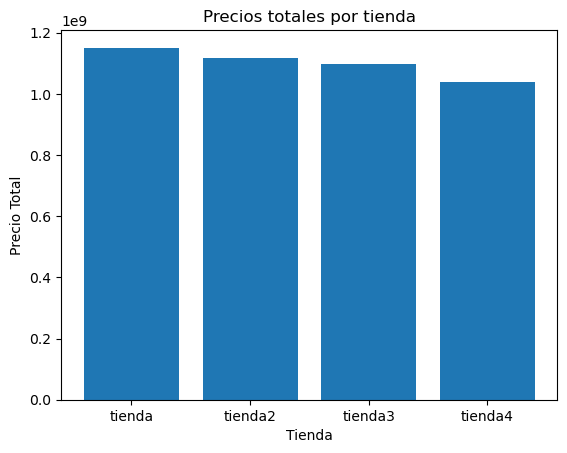

In [5]:
# Visualización de precios por tienda

def visualizar_precios(tiendas):
    totales = {}
    for nombre, tienda in tiendas.items():
        totales[nombre] = calcular_precio(tienda)
    
    plt.bar(totales.keys(), totales.values())
    plt.xlabel('Tienda')
    plt.ylabel('Precio Total')
    plt.title('Precios totales por tienda')
    plt.show()

visualizar_precios(tiendas)

### 2. Ventas por categoría.

In [6]:
def productos_vendidos_por_categoria(tienda):
    categorias = tienda.groupby('Categoría del Producto').size().reset_index(name = 'Cantidad').sort_values(by='Cantidad', ascending=False)
    return categorias

for nombre, tienda in tiendas.items():
    categorias = productos_vendidos_por_categoria(tienda)
    print(f"{nombre}: {categorias}")

tienda:     Categoría del Producto  Cantidad
7                  Muebles       465
3             Electrónicos       448
5                 Juguetes       324
2        Electrodomésticos       312
1     Deportes y diversión       284
4   Instrumentos musicales       182
6                   Libros       173
0  Artículos para el hogar       171
tienda2:     Categoría del Producto  Cantidad
7                  Muebles       442
3             Electrónicos       422
5                 Juguetes       313
2        Electrodomésticos       305
1     Deportes y diversión       275
4   Instrumentos musicales       224
6                   Libros       197
0  Artículos para el hogar       181
tienda3:     Categoría del Producto  Cantidad
7                  Muebles       499
3             Electrónicos       451
5                 Juguetes       315
2        Electrodomésticos       278
1     Deportes y diversión       277
6                   Libros       185
0  Artículos para el hogar       177
4   Instrume

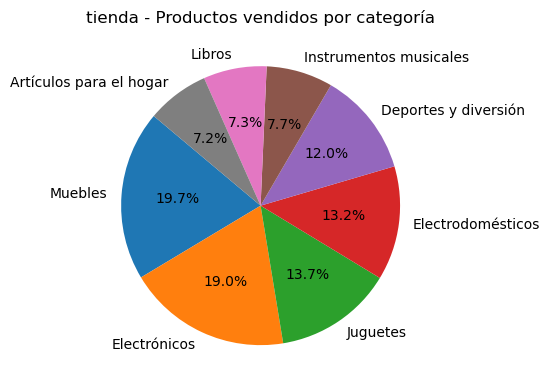

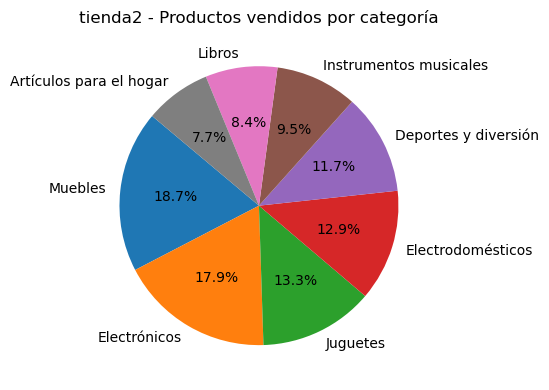

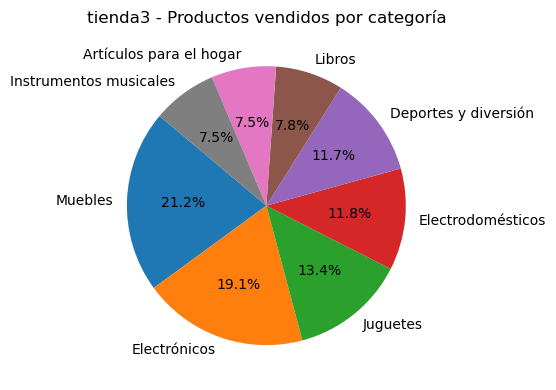

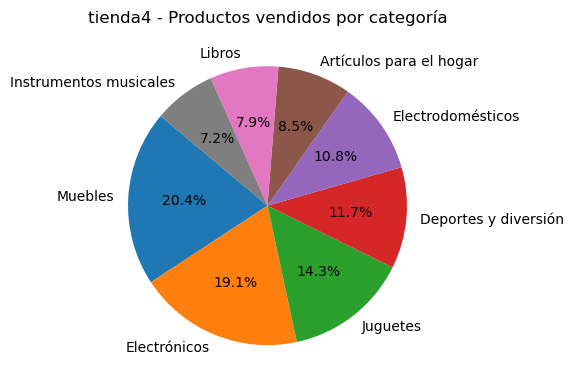

In [19]:
# Visualización de datos
def visualizar_categorias_mas_populares(tiendas):
    categorias_totales = {}
    for nombre, tienda in tiendas.items():
        categorias_totales[nombre] = productos_vendidos_por_categoria(tienda)
    
    for nombre, categorias in categorias_totales.items():
        plt.figure(figsize=(8, 4))
        plt.pie(categorias['Cantidad'], labels=categorias['Categoría del Producto'], autopct='%1.1f%%', startangle=140)
        plt.title(f'{nombre} - Productos vendidos por categoría')
        plt.tight_layout()
        plt.show()

visualizar_categorias_mas_populares(tiendas)

### 3. Calificación promedio de la tienda

In [12]:
def calificaciones_promedio(tiendas):
    calificaciones = {}
    for nombre, tienda in tiendas.items():
        calificaciones[nombre] = sum(tienda['Calificación']) / len(tienda)
        calificaciones[nombre] = round(calificaciones[nombre], 2)
    return calificaciones

for nombre, tienda in tiendas.items():
    satisfaccion = calificaciones_promedio(tiendas)
    print(f"El promedio de calificaciones de la {nombre} es de {satisfaccion[nombre]}")

El promedio de calificaciones de la tienda es de 3.98
El promedio de calificaciones de la tienda2 es de 4.04
El promedio de calificaciones de la tienda3 es de 4.05
El promedio de calificaciones de la tienda4 es de 4.0


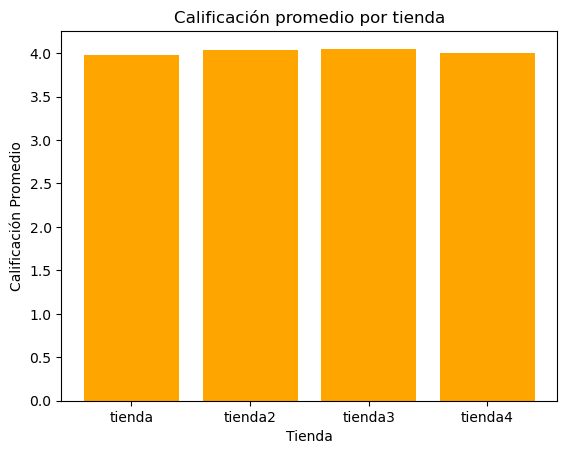

In [23]:
# Visualización de datos

def visualizar_satisfaccion(tiendas):
    calificaciones = calificaciones_promedio(tiendas)
    plt.bar(calificaciones.keys(), calificaciones.values(), color='orange')
    plt.xlabel('Tienda')
    plt.ylabel('Calificación Promedio')
    plt.title('Calificación promedio por tienda')
    plt.show()

visualizar_satisfaccion(tiendas)

### 4. Productos más y menos vendidos

In [17]:
def productos_mas_y_menos_vendidos(tienda):
    productos = tienda.groupby('Producto').size().reset_index(name = 'Cantidad').sort_values(by='Cantidad', ascending=False)
    mas_vendido = productos.iloc[0]
    menos_vendido = productos.iloc[-1]
    return mas_vendido, menos_vendido

for nombre, tienda in tiendas.items():
    mas_vendido, menos_vendido = productos_mas_y_menos_vendidos(tienda)
    print(f"En la {nombre} el producto más vendido es {mas_vendido['Producto']} con {mas_vendido['Cantidad']} ventas")
    print(f"En la {nombre} el producto menos vendido es {menos_vendido['Producto']} con {menos_vendido['Cantidad']} ventas\n")

En la tienda el producto más vendido es TV LED UHD 4K con 60 ventas
En la tienda el producto menos vendido es Celular ABXY con 33 ventas

En la tienda2 el producto más vendido es Iniciando en programación con 65 ventas
En la tienda2 el producto menos vendido es Juego de mesa con 32 ventas

En la tienda3 el producto más vendido es Kit de bancas con 57 ventas
En la tienda3 el producto menos vendido es Bloques de construcción con 35 ventas

En la tienda4 el producto más vendido es Cama box con 62 ventas
En la tienda4 el producto menos vendido es Guitarra eléctrica con 33 ventas



### 5. Envío promedio por tienda

In [25]:
def costo_promedio_envio(tiendas):
    costos_promedios = {}
    for nombre, tienda in tiendas.items():
        costos_promedios[nombre] = tienda['Costo de envío'].mean()
        costos_promedios[nombre] = round(costos_promedios[nombre], 2)
    return costos_promedios

for nombre, tienda in tiendas.items():
    promedio_envios = costo_promedio_envio(tiendas)
    print(f'{nombre}: {promedio_envios[nombre]}')

tienda: 26018.61
tienda2: 25216.24
tienda3: 24805.68
tienda4: 23459.46


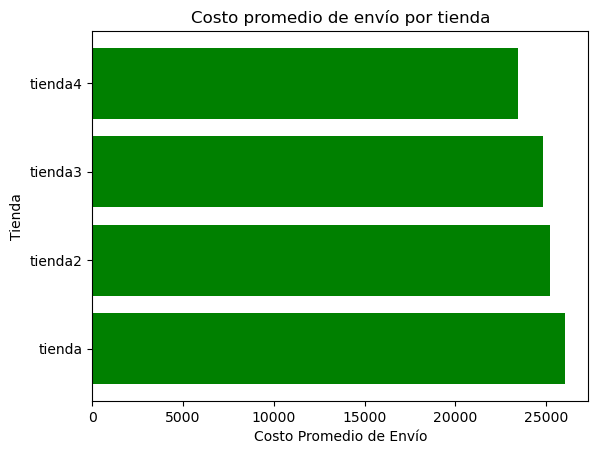

In [26]:
# Visualizar datos

def visualizar_promedio_envios(tiendas):
    costos_promedios = costo_promedio_envio(tiendas)
    plt.barh(costos_promedios.keys(), costos_promedios.values(), color='green')
    plt.xlabel('Costo Promedio de Envío')
    plt.ylabel('Tienda')
    plt.title('Costo promedio de envío por tienda')
    plt.show()

visualizar_promedio_envios(tiendas)